In [1]:
from functools import partial
import json
from pathlib import Path
from PIL import Image as PILImage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from rhana.labeler.unet import RHEEDTensorImage, RHEEDTensorMask, rle_encode, rle_decode
from rhana.labeler.masker import UnetMasker
from rhana.io.kashiwa import find_raw_rheed, get_rheed_time
from rhana.pattern import Rheed, RheedMask
from rhana.tracker.iou import IOUTracker, regions2detections, IOUMaskTracker
from rhana.spectrum.spectrum import CollapseSpectrum

In [2]:
rheeds = find_raw_rheed(Path("~/RHEED/data/RHEED").expanduser())

In [3]:
unet_path = "../learner/UNet_May6_2021_fixed.pkl"
masker = UnetMasker(unet_path)

In [4]:
rd = Rheed.from_kashiwa( rheeds['IT008'][0] )
rd_pp = rd.mean_clip(inplace=False).min_max_scale(inplace=False)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

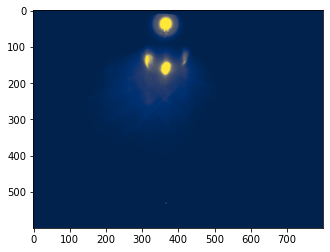

In [5]:
rd_pp.plot_pattern()

In [6]:
masks = masker.predict(rd_pp)

/home/aurora/anaconda3/envs/fastaiv2/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
masks

{'spot': RHEEDTensorImage: torch.Size([600, 800]),
 'streak': RHEEDTensorImage: torch.Size([600, 800])}

In [8]:
rdm_spot = RheedMask(rd, masks['spot'])
rdm_streak = RheedMask(rd, masks['streak'])

In [9]:
regions = rdm_spot.get_regions(with_intensity=True)

In [10]:
regions = rdm_spot.filter_regions(10)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

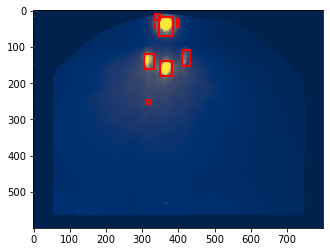

In [11]:
rdm_spot.plot_regions()

In [12]:
top_rdm = rdm_spot.crop(0, 150, 200, 550, inplace=False)

In [13]:
top_masks = masker.predict(top_rdm.rd, )
top_rdm = RheedMask(top_rdm.rd, top_masks['spot'])

In [14]:
top_rdm.get_regions(with_intensity=True)
top_rdm.filter_regions(min_area=10)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

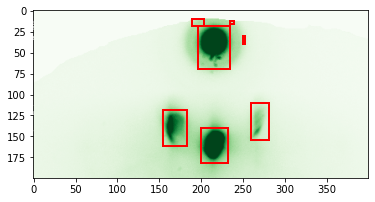

In [26]:
top_rdm.plot_regions()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

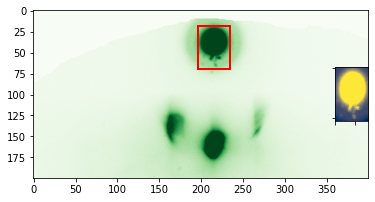

In [24]:
top_rdm.plot_region(2)

In [16]:
crdm = rdm_spot.crop(100, 150, 300, 550, inplace=False)

In [17]:
crdm_masks = masker.predict(crdm.rd)

In [18]:
crdm = RheedMask(crdm.rd, crdm_masks['spot'])

In [19]:
crdm.get_regions()
crdm.filter_regions(10)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

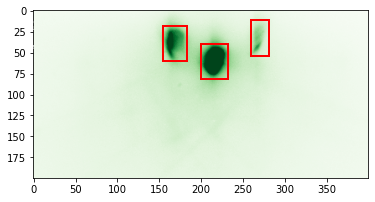

In [23]:
crdm.plot_regions()

In [85]:
crdm.plot_regions??

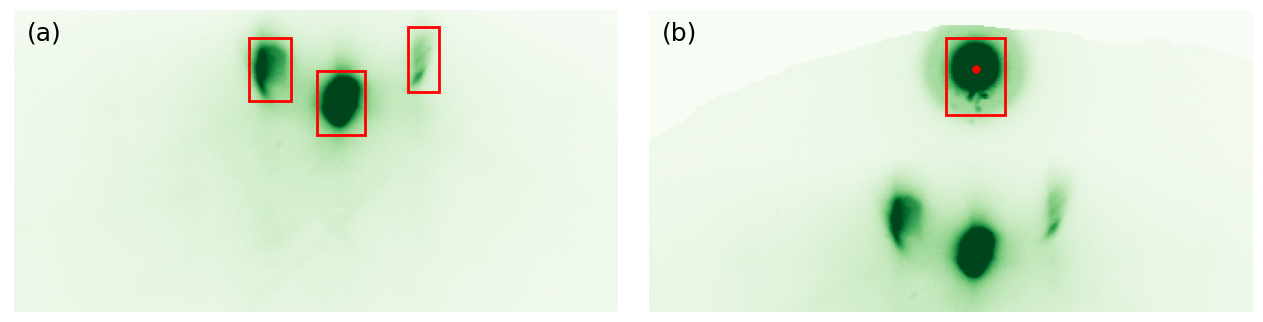

In [22]:
fig, axs = plt.subplots(1,2, figsize=(16,4), dpi=100)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)

crdm.rd._CMAP = "Greens"
_, ax = crdm.plot_regions(dpi=100, ax=axs[0])
ax.set_axis_off()

ax.text(x=0.02, y=0.90, s="(a)", fontdict={"size":18, "color":"black"}, transform=ax.transAxes)

top_rdm.rd._CMAP = "Greens"
_, ax = top_rdm.plot_region(2, zoom=False, dpi=100, ax=axs[1])
ax.set_axis_off()

cen = top_rdm.regions[2].weighted_centroid
ax.scatter(cen[1], cen[0], s=25, c='red')

ax.text(x=0.02, y=0.90, s="(b)", fontdict={"size":18, "color":"black"}, transform=ax.transAxes)

fig.savefig("publication/regions_directbeam.png", bbox_inches='tight')
plt.show()


In [ ]:
frdm.get_regions(with_intensity=True)